In [1]:
from PIL import Image

from encoder import encode

In [2]:
img = Image.open('/Users/freder/Downloads/normals.png')
%time encode(img, 'test.jpg')

CPU times: user 37.1 s, sys: 164 ms, total: 37.2 s
Wall time: 37.4 s


In [3]:
def writeTable(weights, weights2=None):
    weightsStr = ', '.join(map(str, weights))
    
    chromaTable = ''
    if weights2:
        weightsStr2 = ', '.join(map(str, weights2))
        chromaTable = f'''
            <table slot="1" alias="chroma">
              <description>Chroma Quantization Table</description>
              <levels width="8" height="8" divisor="1">
                {weightsStr2}
              </levels>
            </table>
        '''
    
    # https://github.com/ImageMagick/ImageMagick/blob/master/config/quantization-table.xml
    '''
    <levels width="8" height="8" divisor="1">
        16,  16,  16,  18,  25,  37,  56,  85,
        16,  17,  20,  27,  34,  40,  53,  75,
        16,  20,  24,  31,  43,  62,  91,  135,
        18,  27,  31,  40,  53,  74,  106, 156,
        25,  34,  43,  53,  69,  94,  131, 189,
        37,  40,  62,  74,  94,  124, 169, 238,
        56,  53,  91,  106, 131, 169, 226, 311,
        85,  75,  135, 156, 189, 238, 311, 418
    </levels>
    '''
    
    qtable = f'''
    <?xml version="1.0" encoding="ISO-8859-1"?>
    <!DOCTYPE quantization-tables [
      <!ELEMENT quantization-tables (table)>
      <!ATTLIST quantization-tables xmlns CDATA #FIXED "">
      <!ELEMENT table (description , levels)>
      <!ATTLIST table xmlns CDATA #FIXED "">
      <!ATTLIST table alias NMTOKEN #REQUIRED>
      <!ATTLIST table slot CDATA #REQUIRED>
      <!ELEMENT description (#PCDATA)>
      <!ATTLIST description xmlns CDATA #FIXED "">
      <!ELEMENT levels (#PCDATA)>
      <!ATTLIST levels xmlns CDATA #FIXED "">
      <!ATTLIST levels divisor CDATA #REQUIRED>
      <!ATTLIST levels height CDATA #REQUIRED>
      <!ATTLIST levels width CDATA #REQUIRED>
    ]>
    <!--
      JPEG quantization table created by Dr. Nicolas Robidoux, Senior Research
      Scientist at Phase One (www.phaseone.com) for use with 2x2 Chroma
      subsampling and (IJG-style, hence ImageMagick-style) quality level
      around 75.
      It is based on the one recommended in
        Relevance of human vision to JPEG-DCT compression by Stanley A. Klein,
        Amnon D. Silverstein and Thom Carney. In Human Vision, Visual
        Processing and Digital Display III, 1992.
      for 1 minute per pixel viewing.
      Specifying only one table in this xml file has two effects when used with
      the ImageMagick option

        -define jpeg:q-table=PATH/TO/THIS/FILE

      1) This quantization table is automatically used for all three channels;
      2) Only one copy is embedded in the JPG file, which saves a few bits
         (only worthwhile for very small thumbnails).
    -->
    <quantization-tables>
      <table slot="0" alias="luma">
        <description>Luma Quantization Table</description>
        <levels width="8" height="8" divisor="1">
          {weightsStr}
        </levels>
      </table>
      
      {chromaTable}
    </quantization-tables>
    '''
    
    with open('quantization-table.xml', 'w') as f:
        f.write(qtable)


In [80]:
def writeTable2(weights, weights2):
    weightsStr = str(np.array(weights).reshape(8, 8)).replace('[', '').replace(']', '')
    weightsStr2 = str(np.array(weights2).reshape(8, 8)).replace('[', '').replace(']', '')
    with open('tables.txt', 'w') as f:
        f.write(f'{weightsStr}\n\n{weightsStr2}')

/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-0.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


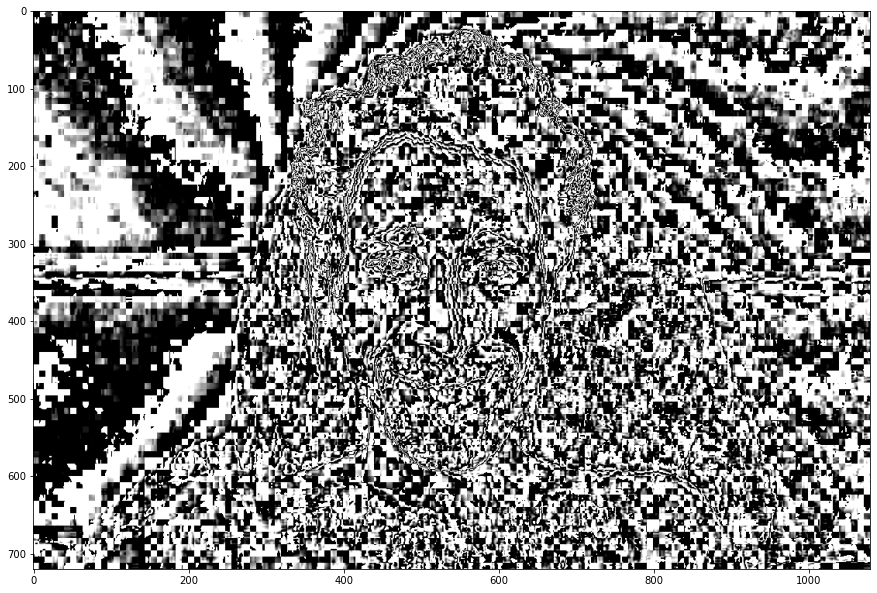

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-1.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


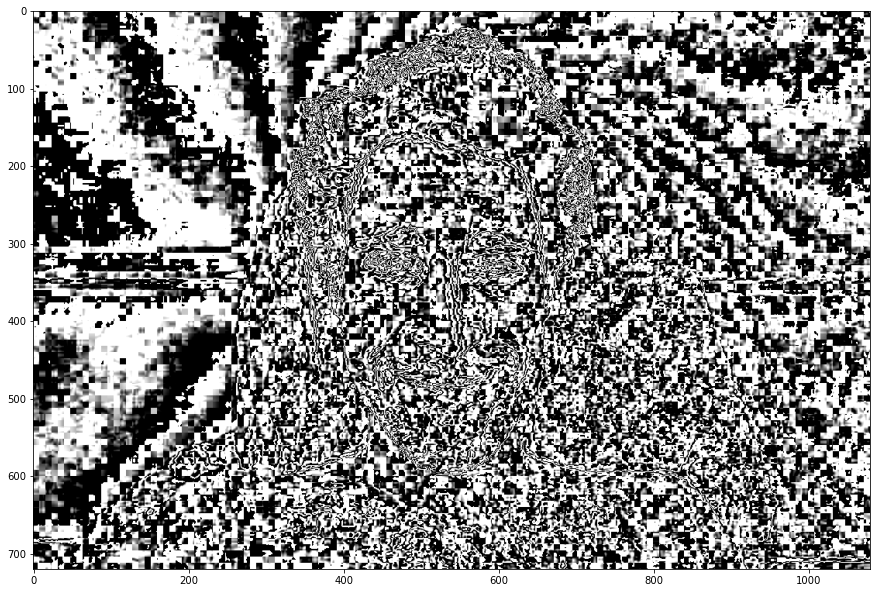

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-2.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


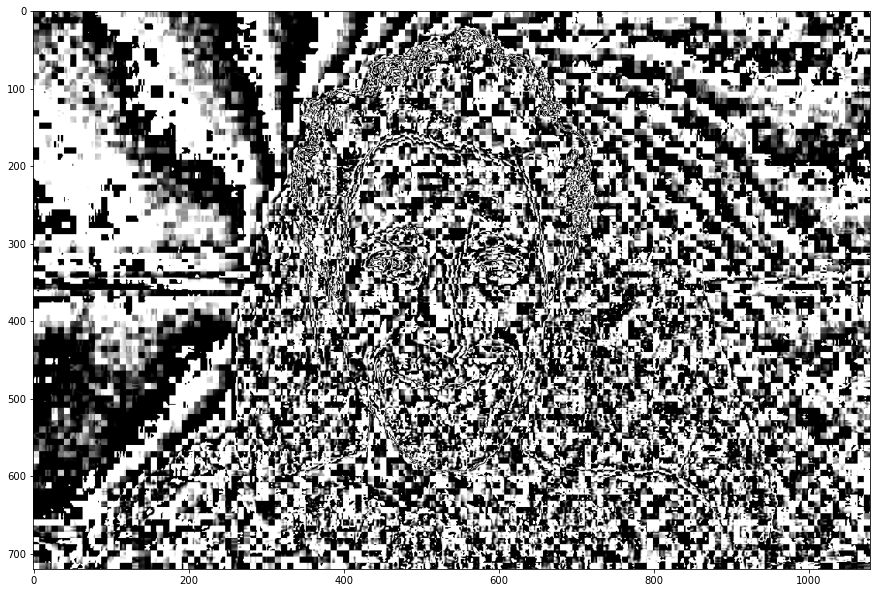

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-3.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


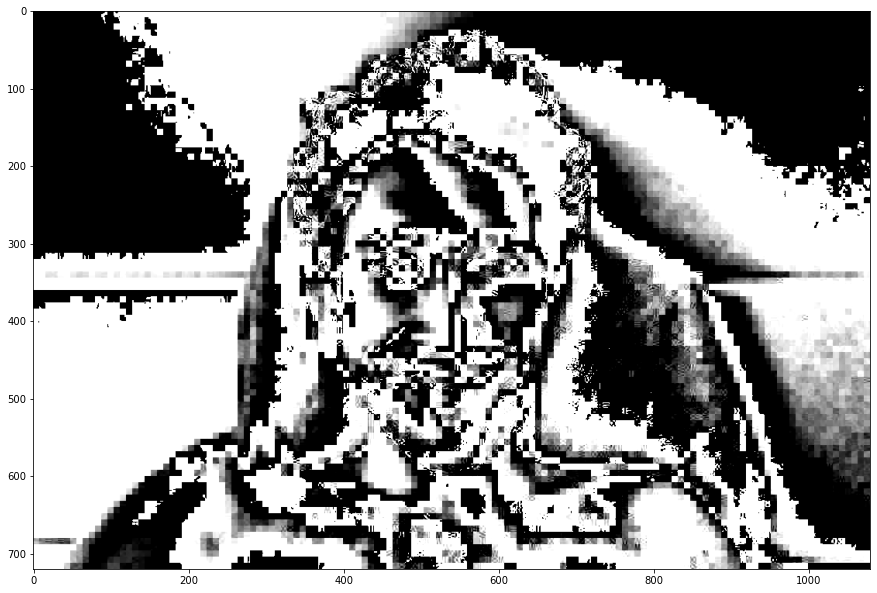

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-4.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


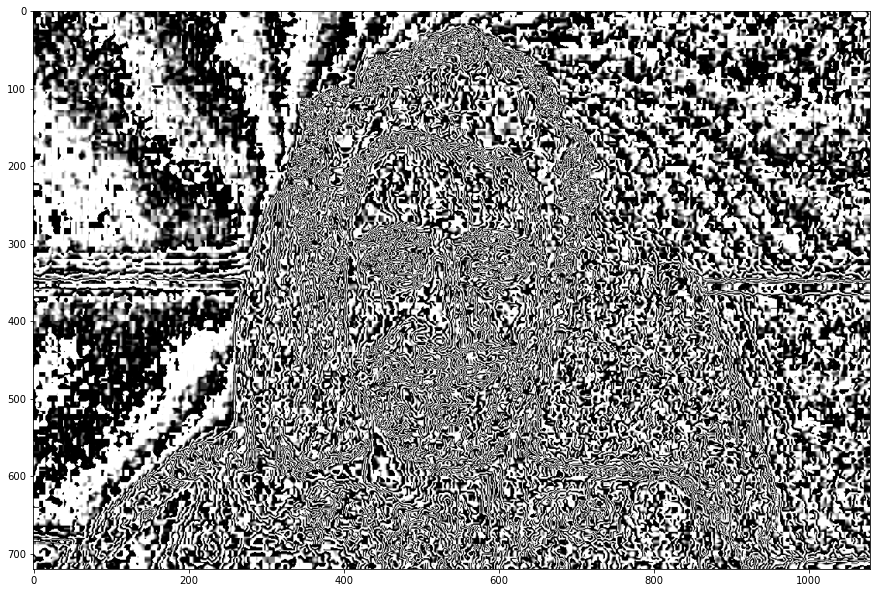

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-5.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


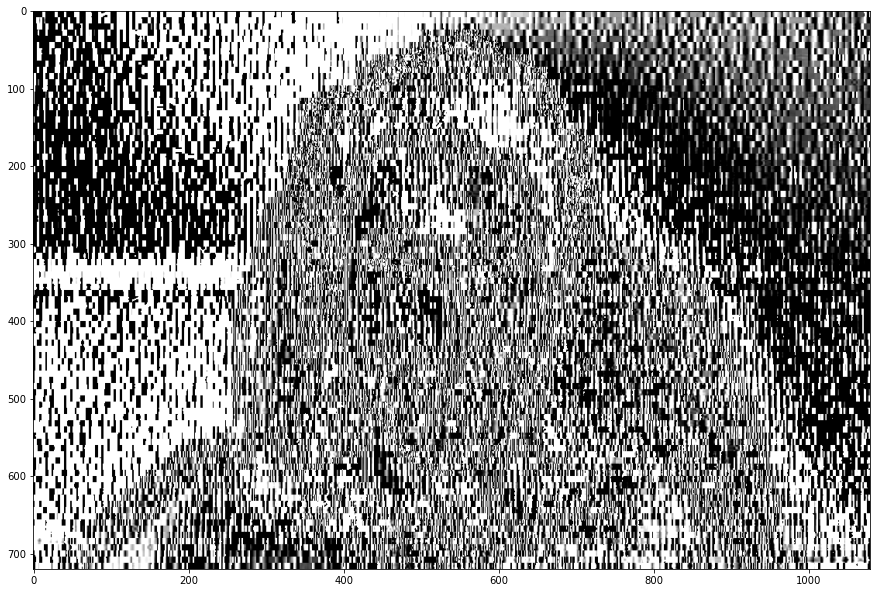

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-6.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


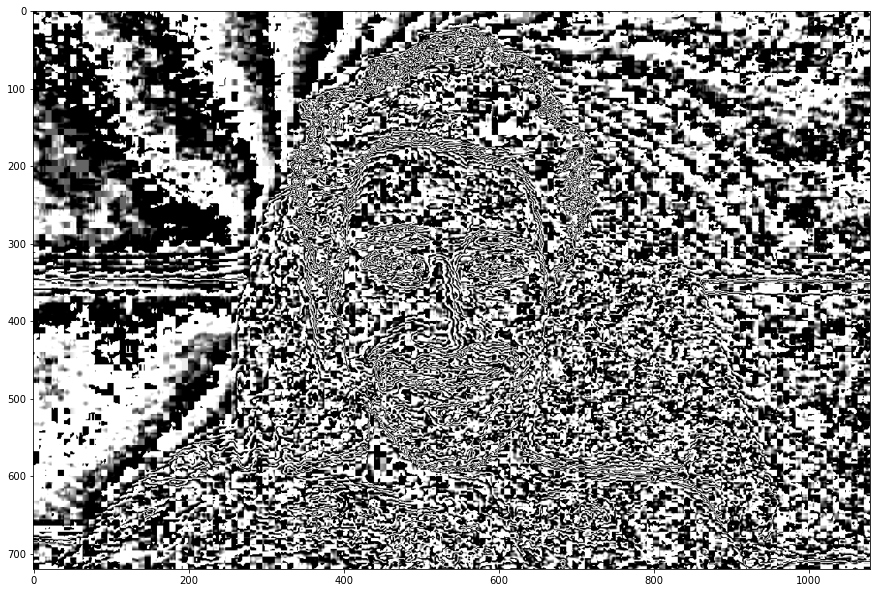

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-7.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


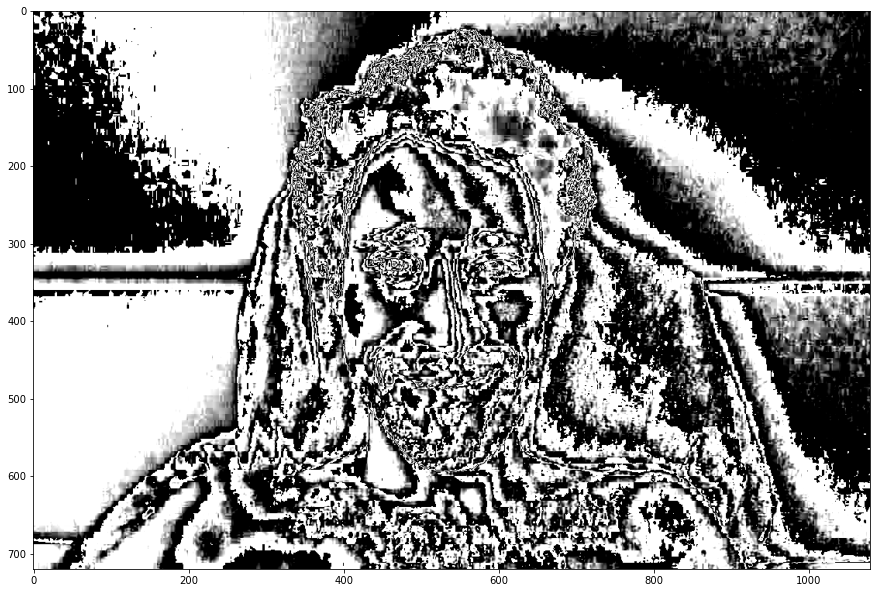

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-8.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


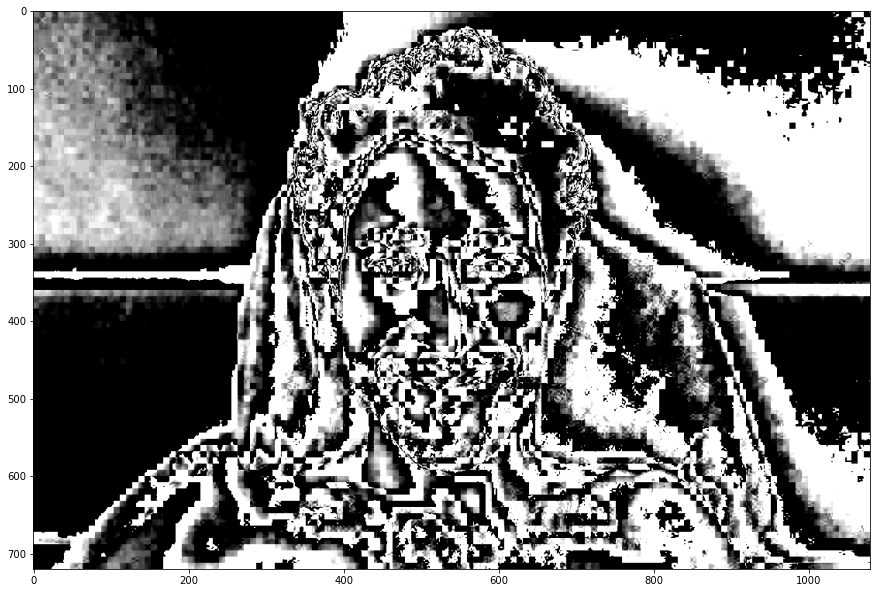

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg -grayscale -baseline -qtables "/Users/freder/projects/projects/jpeg-glitch/tables.txt" -outfile output-9.jpg -quantMultiplier 100 "/Users/freder/Downloads/freder.tga"


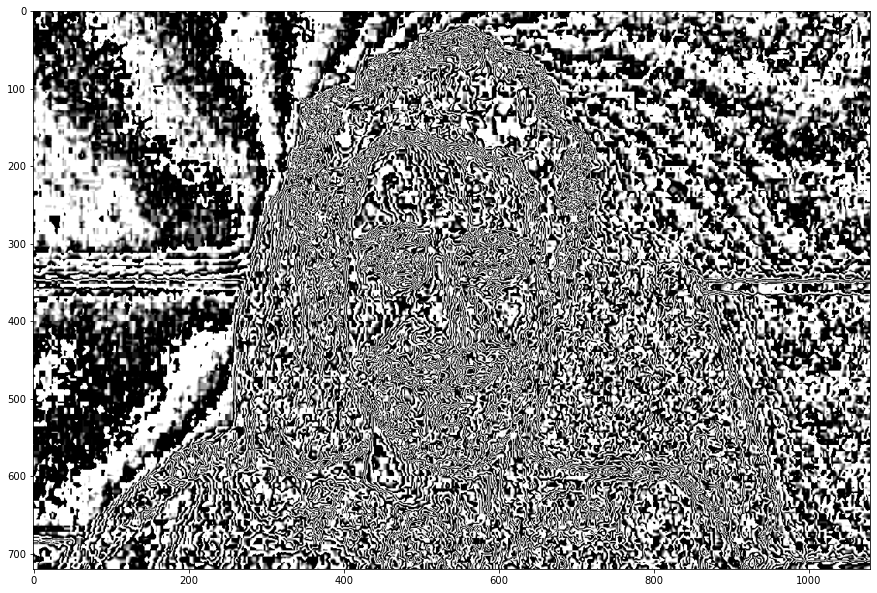

[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]
[[ 0  1  5  6 14 15 27 28]
 [ 2  4  7 13 16 26 29 42]
 [ 3  8 12 17 25 30 41 43]
 [ 9 11 18 24 31 40 44 53]
 [10 19 23 32 39 45 52 54]
 [20 22 33 38 46 51 55 60]
 [21 34 37 47 50 56 59 61]
 [35 36 48 49 57 58 62 63]]


In [275]:
from random import random
import os
import subprocess

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


cjpeg = '/Users/freder/projects/projects/jpeg-glitch/jpeg-9d/cjpeg'
# cjpeg = '/Users/freder/Downloads/_work-jobs-etc/projects/schrofer-lust/sketches/sketches_f/jpeg-compression/jpeg-9/cjpeg'
# cjpeg = '/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/.libs/cjpeg'
# cjpeg = '/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/cjpeg'
# cjpeg = '/Users/freder/miniconda3/bin/cjpeg'

tableFile = '/Users/freder/projects/projects/jpeg-glitch/tables.txt'

# inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga'
# inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/schrofer-lust/sketches/sketches_f/jpeg-compression/jpeg-9/output/book.tga'
# inputFile = '/Users/freder/Downloads/_work-jobs-etc/projects/progressive-jpeg-cutoff/banana.tga'
# inputFile = '/Users/freder/Downloads/Photo on 06-10-2020 at 14.59.tga'
# inputFile = '/Users/freder/Downloads/9139a006d24520e32fe66812e9047add copy.tga'
inputFile = '/Users/freder/Downloads/freder.tga'

zigzag = [
   0,  1,  5,  6, 14, 15, 27, 28,
   2,  4,  7, 13, 16, 26, 29, 42,
   3,  8, 12, 17, 25, 30, 41, 43,
   9, 11, 18, 24, 31, 40, 44, 53,
  10, 19, 23, 32, 39, 45, 52, 54,
  20, 22, 33, 38, 46, 51, 55, 60,
  21, 34, 37, 47, 50, 56, 59, 61,
  35, 36, 48, 49, 57, 58, 62, 63
]

weights = [
    205, 136, 90, 90, 21, 21, 184, 184,
    113, 90, 67, 44, 253, 184, 184, 92,
    90, 67, 44, 253, 184, 161, 92, 92,
    67, 67, 253, 207, 161, 92, 69, 0,
    67, 253, 230, 161, 92, 46, 23, 0,
    253, 230, 161, 115, 46, 23, 232, 209,
    230, 115, 115, 46, 23, 232, 209, 209,
    115, 115, 23, 23, 232, 209, 186, 186
]
weights2 = [
    163, 163, 140, 140, 71, 71, 234, 234,
    163, 140, 117, 71, 71, 234, 234, 119,
    140, 117, 71, 48, 2, 234, 119, 119,
    117, 94, 48, 2, 188, 142, 96, 27,
    94, 48, 2, 188, 165, 96, 50, 27,
    48, 2, 188, 165, 96, 73, 27, 4,
    2, 188, 165, 96, 73, 27, 4, 4,
    165, 165, 96, 73, 27, 4, 236, 213
]


maxVal = 50
offset = 1
def makeRandomWeights():
    return [
#         offset + int(random() * maxVal)
        zigzag[i]
#         int(((zigzag[i] / 64) ** 1.5) * 64)
        for i in range(8 * 8)
    ]


useTables = True
# glitchParams = ' '.join([
#     f'-huffTableMultiplier 0.85',
#     f'-dctNoise 0',
#     f'-quantMultiplier 0',
# ])
glitchParams = ' '.join([
#     f'-huffTableMultiplier 0.85',
#     f'-dctNoise 1000',
    f'-quantMultiplier 100',
])

for i in range(0, 10):
    qtables = ''
    if useTables:
        weights = makeRandomWeights()
        weights2 = makeRandomWeights()
        writeTable2(
            weights, 
            weights2
        )
        qtables = f'-qtables "{tableFile}"'
        
#     os.system('convert "/Users/freder/Downloads/_work-jobs-etc/projects/jpeg-9/_output/kim.tga" -quality 10 -define jpeg:optimize-coding=false -define jpeg:q-table="quantization-table.xml" "output.jpg"')
    outFileName = f'output-{i}.jpg'
    
    cmd = f'{cjpeg} -grayscale -baseline {qtables} -outfile {outFileName} {glitchParams} "{inputFile}"'
    print(cmd)
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = p.communicate()
    if (stdout):
        print(stdout)
    if (stderr):
        print(stderr)
    
    outImg = Image.open(outFileName)
    outImg.save(outFileName + '-test.jpg')
#     imgArr = np.flipud(np.asarray(outImg))
    imgArr = np.asarray(outImg)
    plt.figure(figsize=(15, 15))
    plt.imshow(imgArr, cmap='gray')
    plt.show()
    
    if useTables:
        print(np.array(weights).reshape(8, 8))
        print(np.array(weights2).reshape(8, 8))